<a href="https://colab.research.google.com/github/vaidande/SoccerVsRugby-VGG16/blob/main/SoccerVsRugby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob

In [18]:
IMAGE_SIZE = [224, 224]
 
train_path = '/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/train'
valid_path = '/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/test'

In [19]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #+ [3]: No. of channels.(RGB)
                                                                                   #weights='imagnet': retrives the same weights which where used in the ImageNet competition.
                                                                                   #include_top=False: removes the default VGG16 input, Flatten and Output layer.

58892288/58889256 [==============================] - 0s 0us/step


In [20]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [21]:
#don't train existing weights.
for layer in vgg16.layers:
  layer.trainable = False #Not to update weights (as we are using ImageNet weights), we are freezing the VGG16 architecture.

In [22]:
#useful for getting no. of output classes.
folders = glob('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/train/*')

In [23]:
#flattening..
x = Flatten()(vgg16.output)

In [24]:
#adding Dense layer..
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg16.input, outputs=prediction) #creating model object.. 
                                                      #inputs=vgg16.input specifies the input we created
                                                      #outputs=prediction specifies the output layer we created

In [25]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [28]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2448 images belonging to 2 classes.
Found 610 images belonging to 2 classes.


In [29]:
checkpoint_path = '/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/model'
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [31]:
r = model.fit_generator(training_set,
                        validation_data = test_set,
                        epochs=20,
                        steps_per_epoch = len(training_set),
                        validation_steps = 2, callbacks = [cp_callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
77/77 [==============================] - 67s 873ms/step - loss: 0.1561 - accuracy: 0.9416 - val_loss: 0.6767 - val_accuracy: 0.7344

Epoch 00001: saving model to /content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/model
Epoch 2/20
77/77 [==============================] - 68s 876ms/step - loss: 0.1674 - accuracy: 0.9367 - val_loss: 0.7461 - val_accuracy: 0.7344

Epoch 00002: saving model to /content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/model
Epoch 3/20
77/77 [==============================] - 68s 880ms/step - loss: 0.1526 - accuracy: 0.9359 - val_loss: 0.6633 - val_accuracy: 0.7969

Epoch 00003: saving model to /content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/model
Epoch 4/20
77/77 [==============================] - 67s 870ms/step - loss: 0.1306 - accuracy: 0.9502 - val_loss: 0.8910 - val_accuracy: 0.7188

Epoch 00004: saving model to /content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/model
Epoch 5/20
77/77 [==============================] - 71s 916ms/step - los

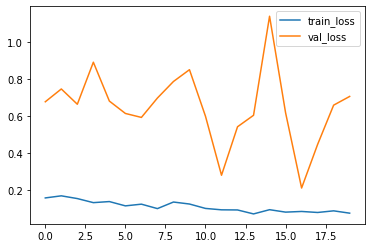

<Figure size 432x288 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig('Loss_ValLoss')

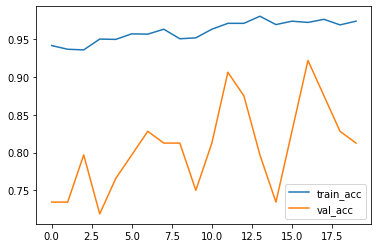

<Figure size 432x288 with 0 Axes>

In [33]:
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('Acc_ValAcc')

In [34]:
from tensorflow.keras.models import load_model
model.save('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/model/model_vgg16.h5')

In [35]:
y_pred = model.predict(test_set)

In [36]:
y_pred = np.argmax(y_pred, axis = 1)

In [37]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [55]:
x=image.load_img('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/test/soccer/rugby.1,249.jpg',target_size=(224,224))

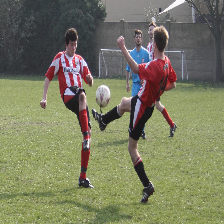

In [56]:
x

In [57]:
test_img = image.img_to_array(x)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis = 0)
result = model.predict(test_img)

In [58]:
a=np.argmax(result, axis=1)

In [59]:
if a==1:
  print("Its a Rugby Game!")
else:
  print("Its a Soccer Game!")

Its a Soccer Game!


In [121]:
x2=image.load_img('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/test/rugby/rugby.1,426.jpg',target_size=(224,224))

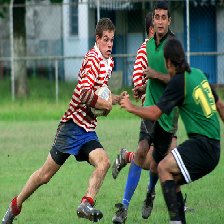

In [122]:
x2

In [128]:
test_img2 = image.img_to_array(x2)
test_img2 = test_img2/255
test_img2 = np.expand_dims(test_img2, axis = 0)
result2 = model.predict(test_img2)

In [129]:
a2=np.argmax(result2, axis=1)

In [130]:
if a2==1:
  print("Its a Rugby Game!")
else:
  print("Its a Soccer Game!")

Its a Rugby Game!
